# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

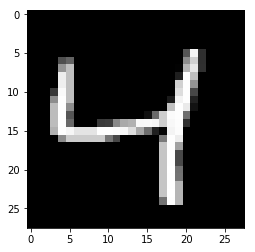

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 50 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 784))
targets_ = tf.placeholder(tf.float32, (None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6955
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6865
Epoch: 1/20... Training loss: 0.6814
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6685
Epoch: 1/20... Training loss: 0.6597
Epoch: 1/20... Training loss: 0.6490
Epoch: 1/20... Training loss: 0.6361
Epoch: 1/20... Training loss: 0.6206
Epoch: 1/20... Training loss: 0.6061
Epoch: 1/20... Training loss: 0.5886
Epoch: 1/20... Training loss: 0.5676
Epoch: 1/20... Training loss: 0.5475
Epoch: 1/20... Training loss: 0.5282
Epoch: 1/20... Training loss: 0.5047
Epoch: 1/20... Training loss: 0.4845
Epoch: 1/20... Training loss: 0.4616
Epoch: 1/20... Training loss: 0.4411
Epoch: 1/20... Training loss: 0.4201
Epoch: 1/20... Training loss: 0.4037
Epoch: 1/20... Training loss: 0.3921
Epoch: 1/20... Training loss: 0.3752
Epoch: 1/20... Training loss: 0.3616
Epoch: 1/20... Training loss: 0.3462
Epoch: 1/20... Training loss: 0.3311
Epoch: 1/20... Training loss: 0.3282
E

Epoch: 1/20... Training loss: 0.1766
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1785
Epoch: 1/20... Training loss: 0.1739
Epoch: 1/20... Training loss: 0.1717
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1779
Epoch: 1/20... Training loss: 0.1702
Epoch: 1/20... Training loss: 0.1653
Epoch: 1/20... Training loss: 0.1741
Epoch: 1/20... Training loss: 0.1731
Epoch: 1/20... Training loss: 0.1690
Epoch: 1/20... Training loss: 0.1747
Epoch: 1/20... Training loss: 0.1792
Epoch: 1/20... Training loss: 0.1742
Epoch: 1/20... Training loss: 0.1683
Epoch: 1/20... Training loss: 0.1701
Epoch: 1/20... Training loss: 0.1711
Epoch: 1/20... Training loss: 0.1668
Epoch: 1/20... Training loss: 0.1680
Epoch: 1/20... Training loss: 0.1688
Epoch: 1/20... Training loss: 0.1727
Epoch: 1/20... Training loss: 0.1697
Epoch: 1/20... Training loss: 0.1733
Epoch: 1/20... Training loss: 0.1711
Epoch: 1/20... Training loss: 0.1720
Epoch: 1/20... Training loss: 0.1753
E

Epoch: 2/20... Training loss: 0.1414
Epoch: 2/20... Training loss: 0.1374
Epoch: 2/20... Training loss: 0.1375
Epoch: 2/20... Training loss: 0.1367
Epoch: 2/20... Training loss: 0.1421
Epoch: 2/20... Training loss: 0.1413
Epoch: 2/20... Training loss: 0.1372
Epoch: 2/20... Training loss: 0.1354
Epoch: 2/20... Training loss: 0.1381
Epoch: 2/20... Training loss: 0.1369
Epoch: 2/20... Training loss: 0.1388
Epoch: 2/20... Training loss: 0.1338
Epoch: 2/20... Training loss: 0.1437
Epoch: 2/20... Training loss: 0.1415
Epoch: 2/20... Training loss: 0.1384
Epoch: 2/20... Training loss: 0.1430
Epoch: 2/20... Training loss: 0.1403
Epoch: 2/20... Training loss: 0.1401
Epoch: 2/20... Training loss: 0.1369
Epoch: 2/20... Training loss: 0.1367
Epoch: 2/20... Training loss: 0.1399
Epoch: 2/20... Training loss: 0.1350
Epoch: 2/20... Training loss: 0.1368
Epoch: 2/20... Training loss: 0.1385
Epoch: 2/20... Training loss: 0.1348
Epoch: 2/20... Training loss: 0.1404
Epoch: 2/20... Training loss: 0.1372
E

Epoch: 3/20... Training loss: 0.1155
Epoch: 3/20... Training loss: 0.1223
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1221
Epoch: 3/20... Training loss: 0.1219
Epoch: 3/20... Training loss: 0.1208
Epoch: 3/20... Training loss: 0.1202
Epoch: 3/20... Training loss: 0.1135
Epoch: 3/20... Training loss: 0.1212
Epoch: 3/20... Training loss: 0.1214
Epoch: 3/20... Training loss: 0.1225
Epoch: 3/20... Training loss: 0.1215
Epoch: 3/20... Training loss: 0.1135
Epoch: 3/20... Training loss: 0.1198
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1203
Epoch: 3/20... Training loss: 0.1213
Epoch: 3/20... Training loss: 0.1174
Epoch: 3/20... Training loss: 0.1197
Epoch: 3/20... Training loss: 0.1210
Epoch: 3/20... Training loss: 0.1190
Epoch: 3/20... Training loss: 0.1229
Epoch: 3/20... Training loss: 0.1194
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1186
Epoch: 3/20... Training loss: 0.1169
Epoch: 3/20... Training loss: 0.1193
E

Epoch: 4/20... Training loss: 0.1081
Epoch: 4/20... Training loss: 0.1082
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1066
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1091
Epoch: 4/20... Training loss: 0.1097
Epoch: 4/20... Training loss: 0.1067
Epoch: 4/20... Training loss: 0.1087
Epoch: 4/20... Training loss: 0.1046
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1089
Epoch: 4/20... Training loss: 0.1062
Epoch: 4/20... Training loss: 0.1081
Epoch: 4/20... Training loss: 0.1081
Epoch: 4/20... Training loss: 0.1098
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1023
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1064
Epoch: 4/20... Training loss: 0.1043
Epoch: 4/20... Training loss: 0.1067
Epoch: 4/20... Training loss: 0.1070
Epoch: 4/20... Training loss: 0.1068
Epoch: 4/20... Training loss: 0.1098
E

Epoch: 4/20... Training loss: 0.1020
Epoch: 4/20... Training loss: 0.1006
Epoch: 4/20... Training loss: 0.0999
Epoch: 4/20... Training loss: 0.0987
Epoch: 4/20... Training loss: 0.1017
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1046
Epoch: 4/20... Training loss: 0.1010
Epoch: 4/20... Training loss: 0.0997
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.1005
Epoch: 4/20... Training loss: 0.0969
Epoch: 4/20... Training loss: 0.1017
Epoch: 4/20... Training loss: 0.1000
Epoch: 4/20... Training loss: 0.0994
Epoch: 4/20... Training loss: 0.0981
Epoch: 4/20... Training loss: 0.0996
Epoch: 4/20... Training loss: 0.1035
Epoch: 4/20... Training loss: 0.0985
Epoch: 4/20... Training loss: 0.1040
Epoch: 4/20... Training loss: 0.0996
Epoch: 4/20... Training loss: 0.0976
Epoch: 4/20... Training loss: 0.0969
Epoch: 4/20... Training loss: 0.0988
Epoch: 4/20... Training loss: 0.0969
Epoch: 5/20... Training loss: 0.0997
E

Epoch: 5/20... Training loss: 0.0939
Epoch: 5/20... Training loss: 0.0960
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0950
Epoch: 5/20... Training loss: 0.0939
Epoch: 5/20... Training loss: 0.0948
Epoch: 5/20... Training loss: 0.0935
Epoch: 5/20... Training loss: 0.0925
Epoch: 5/20... Training loss: 0.0935
Epoch: 5/20... Training loss: 0.0927
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.0963
Epoch: 5/20... Training loss: 0.0941
Epoch: 5/20... Training loss: 0.0932
Epoch: 5/20... Training loss: 0.0974
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0929
Epoch: 5/20... Training loss: 0.0963
Epoch: 5/20... Training loss: 0.0923
Epoch: 5/20... Training loss: 0.0952
Epoch: 5/20... Training loss: 0.0946
Epoch: 5/20... Training loss: 0.0928
Epoch: 5/20... Training loss: 0.0937
Epoch: 5/20... Training loss: 0.0931
Epoch: 5/20... Training loss: 0.0932
Epoch: 5/20... Training loss: 0.0945
Epoch: 5/20... Training loss: 0.0942
E

Epoch: 6/20... Training loss: 0.0886
Epoch: 6/20... Training loss: 0.0908
Epoch: 6/20... Training loss: 0.0880
Epoch: 6/20... Training loss: 0.0869
Epoch: 6/20... Training loss: 0.0893
Epoch: 6/20... Training loss: 0.0876
Epoch: 6/20... Training loss: 0.0911
Epoch: 6/20... Training loss: 0.0896
Epoch: 6/20... Training loss: 0.0900
Epoch: 6/20... Training loss: 0.0899
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0897
Epoch: 6/20... Training loss: 0.0884
Epoch: 6/20... Training loss: 0.0873
Epoch: 6/20... Training loss: 0.0936
Epoch: 6/20... Training loss: 0.0909
Epoch: 6/20... Training loss: 0.0887
Epoch: 6/20... Training loss: 0.0907
Epoch: 6/20... Training loss: 0.0909
Epoch: 6/20... Training loss: 0.0895
Epoch: 6/20... Training loss: 0.0879
Epoch: 6/20... Training loss: 0.0864
Epoch: 6/20... Training loss: 0.0891
Epoch: 6/20... Training loss: 0.0904
Epoch: 6/20... Training loss: 0.0919
Epoch: 6/20... Training loss: 0.0890
Epoch: 6/20... Training loss: 0.0917
E

Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0856
Epoch: 7/20... Training loss: 0.0846
Epoch: 7/20... Training loss: 0.0861
Epoch: 7/20... Training loss: 0.0911
Epoch: 7/20... Training loss: 0.0899
Epoch: 7/20... Training loss: 0.0858
Epoch: 7/20... Training loss: 0.0845
Epoch: 7/20... Training loss: 0.0841
Epoch: 7/20... Training loss: 0.0828
Epoch: 7/20... Training loss: 0.0867
Epoch: 7/20... Training loss: 0.0874
Epoch: 7/20... Training loss: 0.0841
Epoch: 7/20... Training loss: 0.0835
Epoch: 7/20... Training loss: 0.0875
Epoch: 7/20... Training loss: 0.0855
Epoch: 7/20... Training loss: 0.0867
Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0885
Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0842
Epoch: 7/20... Training loss: 0.0864
Epoch: 7/20... Training loss: 0.0870
Epoch: 7/20... Training loss: 0.0850
Epoch: 7/20... Training loss: 0.0835
Epoch: 7/20... Training loss: 0.0858
Epoch: 7/20... Training loss: 0.0862
E

Epoch: 8/20... Training loss: 0.0836
Epoch: 8/20... Training loss: 0.0819
Epoch: 8/20... Training loss: 0.0824
Epoch: 8/20... Training loss: 0.0837
Epoch: 8/20... Training loss: 0.0857
Epoch: 8/20... Training loss: 0.0851
Epoch: 8/20... Training loss: 0.0849
Epoch: 8/20... Training loss: 0.0843
Epoch: 8/20... Training loss: 0.0813
Epoch: 8/20... Training loss: 0.0844
Epoch: 8/20... Training loss: 0.0823
Epoch: 8/20... Training loss: 0.0860
Epoch: 8/20... Training loss: 0.0855
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0837
Epoch: 8/20... Training loss: 0.0819
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0861
Epoch: 8/20... Training loss: 0.0826
Epoch: 8/20... Training loss: 0.0823
Epoch: 8/20... Training loss: 0.0835
Epoch: 8/20... Training loss: 0.0847
Epoch: 8/20... Training loss: 0.0813
Epoch: 8/20... Training loss: 0.0817
Epoch: 8/20... Training loss: 0.0850
Epoch: 8/20... Training loss: 0.0821
E

Epoch: 8/20... Training loss: 0.0814
Epoch: 8/20... Training loss: 0.0835
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0830
Epoch: 8/20... Training loss: 0.0839
Epoch: 8/20... Training loss: 0.0833
Epoch: 8/20... Training loss: 0.0814
Epoch: 8/20... Training loss: 0.0856
Epoch: 8/20... Training loss: 0.0810
Epoch: 8/20... Training loss: 0.0847
Epoch: 8/20... Training loss: 0.0804
Epoch: 8/20... Training loss: 0.0802
Epoch: 8/20... Training loss: 0.0820
Epoch: 8/20... Training loss: 0.0813
Epoch: 8/20... Training loss: 0.0885
Epoch: 8/20... Training loss: 0.0827
Epoch: 8/20... Training loss: 0.0820
Epoch: 8/20... Training loss: 0.0805
Epoch: 8/20... Training loss: 0.0852
Epoch: 8/20... Training loss: 0.0846
Epoch: 8/20... Training loss: 0.0829
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0840
Epoch: 8/20... Training loss: 0.0832
Epoch: 8/20... Training loss: 0.0819
Epoch: 8/20... Training loss: 0.0834
Epoch: 8/20... Training loss: 0.0819
E

Epoch: 9/20... Training loss: 0.0800
Epoch: 9/20... Training loss: 0.0821
Epoch: 9/20... Training loss: 0.0804
Epoch: 9/20... Training loss: 0.0811
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0794
Epoch: 9/20... Training loss: 0.0834
Epoch: 9/20... Training loss: 0.0801
Epoch: 9/20... Training loss: 0.0829
Epoch: 9/20... Training loss: 0.0815
Epoch: 9/20... Training loss: 0.0812
Epoch: 9/20... Training loss: 0.0782
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0822
Epoch: 9/20... Training loss: 0.0824
Epoch: 9/20... Training loss: 0.0827
Epoch: 9/20... Training loss: 0.0823
Epoch: 9/20... Training loss: 0.0817
Epoch: 9/20... Training loss: 0.0822
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0815
Epoch: 9/20... Training loss: 0.0819
Epoch: 9/20... Training loss: 0.0816
Epoch: 9/20... Training loss: 0.0814
Epoch: 9/20... Training loss: 0.0804
Epoch: 9/20... Training loss: 0.0829
Epoch: 9/20... Training loss: 0.0800
E

Epoch: 10/20... Training loss: 0.0795
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0829
Epoch: 10/20... Training loss: 0.0806
Epoch: 10/20... Training loss: 0.0832
Epoch: 10/20... Training loss: 0.0834
Epoch: 10/20... Training loss: 0.0815
Epoch: 10/20... Training loss: 0.0793
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0841
Epoch: 10/20... Training loss: 0.0819
Epoch: 10/20... Training loss: 0.0818
Epoch: 10/20... Training loss: 0.0829
Epoch: 10/20... Training loss: 0.0827
Epoch: 10/20... Training loss: 0.0830
Epoch: 10/20... Training loss: 0.0785
Epoch: 10/20... Training loss: 0.0793
Epoch: 10/20... Training loss: 0.0809
Epoch: 10/20... Training loss: 0.0808
Epoch: 10/20... Training loss: 0.0778
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0806
Epoch: 10/20... Training loss: 0.0821
Epoch: 10/20... Training loss: 0.0796
Epoch: 10/20... Training loss: 0.0795
Epoch: 10/20... Training loss: 0.0799
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0812
Epoch: 11/20... Training loss: 0.0803
Epoch: 11/20... Training loss: 0.0811
Epoch: 11/20... Training loss: 0.0794
Epoch: 11/20... Training loss: 0.0781
Epoch: 11/20... Training loss: 0.0780
Epoch: 11/20... Training loss: 0.0802
Epoch: 11/20... Training loss: 0.0781
Epoch: 11/20... Training loss: 0.0792
Epoch: 11/20... Training loss: 0.0790
Epoch: 11/20... Training loss: 0.0837
Epoch: 11/20... Training loss: 0.0803
Epoch: 11/20... Training loss: 0.0792
Epoch: 11/20... Training loss: 0.0805
Epoch: 11/20... Training loss: 0.0795
Epoch: 11/20... Training loss: 0.0796
Epoch: 11/20... Training loss: 0.0799
Epoch: 11/20... Training loss: 0.0819
Epoch: 11/20... Training loss: 0.0807
Epoch: 11/20... Training loss: 0.0804
Epoch: 11/20... Training loss: 0.0813
Epoch: 11/20... Training loss: 0.0804
Epoch: 11/20... Training loss: 0.0790
Epoch: 11/20... Training loss: 0.0807
Epoch: 11/20... Training loss: 0.0808
Epoch: 11/20... Training loss: 0.0800
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0800
Epoch: 11/20... Training loss: 0.0796
Epoch: 11/20... Training loss: 0.0804
Epoch: 11/20... Training loss: 0.0814
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0778
Epoch: 11/20... Training loss: 0.0813
Epoch: 11/20... Training loss: 0.0800
Epoch: 11/20... Training loss: 0.0786
Epoch: 11/20... Training loss: 0.0803
Epoch: 11/20... Training loss: 0.0785
Epoch: 11/20... Training loss: 0.0823
Epoch: 11/20... Training loss: 0.0826
Epoch: 12/20... Training loss: 0.0796
Epoch: 12/20... Training loss: 0.0807
Epoch: 12/20... Training loss: 0.0801
Epoch: 12/20... Training loss: 0.0816
Epoch: 12/20... Training loss: 0.0769
Epoch: 12/20... Training loss: 0.0809
Epoch: 12/20... Training loss: 0.0816
Epoch: 12/20... Training loss: 0.0795
Epoch: 12/20... Training loss: 0.0807
Epoch: 12/20... Training loss: 0.0807
Epoch: 12/20... Training loss: 0.0791
Epoch: 12/20... Training loss: 0.0791
Epoch: 12/20... Training loss: 0.0768
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0795
Epoch: 12/20... Training loss: 0.0816
Epoch: 12/20... Training loss: 0.0780
Epoch: 12/20... Training loss: 0.0813
Epoch: 12/20... Training loss: 0.0789
Epoch: 12/20... Training loss: 0.0780
Epoch: 12/20... Training loss: 0.0824
Epoch: 12/20... Training loss: 0.0799
Epoch: 12/20... Training loss: 0.0793
Epoch: 12/20... Training loss: 0.0778
Epoch: 12/20... Training loss: 0.0788
Epoch: 12/20... Training loss: 0.0819
Epoch: 12/20... Training loss: 0.0799
Epoch: 12/20... Training loss: 0.0789
Epoch: 12/20... Training loss: 0.0804
Epoch: 12/20... Training loss: 0.0790
Epoch: 12/20... Training loss: 0.0816
Epoch: 12/20... Training loss: 0.0785
Epoch: 12/20... Training loss: 0.0822
Epoch: 12/20... Training loss: 0.0782
Epoch: 12/20... Training loss: 0.0799
Epoch: 12/20... Training loss: 0.0810
Epoch: 12/20... Training loss: 0.0784
Epoch: 12/20... Training loss: 0.0802
Epoch: 12/20... Training loss: 0.0791
Epoch: 12/20... Training loss: 0.0796
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0791
Epoch: 13/20... Training loss: 0.0788
Epoch: 13/20... Training loss: 0.0800
Epoch: 13/20... Training loss: 0.0784
Epoch: 13/20... Training loss: 0.0785
Epoch: 13/20... Training loss: 0.0824
Epoch: 13/20... Training loss: 0.0783
Epoch: 13/20... Training loss: 0.0804
Epoch: 13/20... Training loss: 0.0812
Epoch: 13/20... Training loss: 0.0801
Epoch: 13/20... Training loss: 0.0831
Epoch: 13/20... Training loss: 0.0818
Epoch: 13/20... Training loss: 0.0806
Epoch: 13/20... Training loss: 0.0803
Epoch: 13/20... Training loss: 0.0796
Epoch: 13/20... Training loss: 0.0811
Epoch: 13/20... Training loss: 0.0795
Epoch: 13/20... Training loss: 0.0819
Epoch: 13/20... Training loss: 0.0785
Epoch: 13/20... Training loss: 0.0788
Epoch: 13/20... Training loss: 0.0812
Epoch: 13/20... Training loss: 0.0780
Epoch: 13/20... Training loss: 0.0781
Epoch: 13/20... Training loss: 0.0813
Epoch: 13/20... Training loss: 0.0791
Epoch: 13/20... Training loss: 0.0789
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0792
Epoch: 14/20... Training loss: 0.0788
Epoch: 14/20... Training loss: 0.0787
Epoch: 14/20... Training loss: 0.0773
Epoch: 14/20... Training loss: 0.0793
Epoch: 14/20... Training loss: 0.0815
Epoch: 14/20... Training loss: 0.0758
Epoch: 14/20... Training loss: 0.0808
Epoch: 14/20... Training loss: 0.0771
Epoch: 14/20... Training loss: 0.0786
Epoch: 14/20... Training loss: 0.0782
Epoch: 14/20... Training loss: 0.0784
Epoch: 14/20... Training loss: 0.0816
Epoch: 14/20... Training loss: 0.0784
Epoch: 14/20... Training loss: 0.0793
Epoch: 14/20... Training loss: 0.0799
Epoch: 14/20... Training loss: 0.0767
Epoch: 14/20... Training loss: 0.0783
Epoch: 14/20... Training loss: 0.0824
Epoch: 14/20... Training loss: 0.0816
Epoch: 14/20... Training loss: 0.0791
Epoch: 14/20... Training loss: 0.0769
Epoch: 14/20... Training loss: 0.0807
Epoch: 14/20... Training loss: 0.0796
Epoch: 14/20... Training loss: 0.0807
Epoch: 14/20... Training loss: 0.0791
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0797
Epoch: 14/20... Training loss: 0.0805
Epoch: 14/20... Training loss: 0.0790
Epoch: 14/20... Training loss: 0.0786
Epoch: 14/20... Training loss: 0.0810
Epoch: 14/20... Training loss: 0.0805
Epoch: 14/20... Training loss: 0.0784
Epoch: 14/20... Training loss: 0.0788
Epoch: 14/20... Training loss: 0.0811
Epoch: 14/20... Training loss: 0.0795
Epoch: 14/20... Training loss: 0.0825
Epoch: 14/20... Training loss: 0.0776
Epoch: 14/20... Training loss: 0.0820
Epoch: 14/20... Training loss: 0.0783
Epoch: 14/20... Training loss: 0.0793
Epoch: 15/20... Training loss: 0.0809
Epoch: 15/20... Training loss: 0.0808
Epoch: 15/20... Training loss: 0.0777
Epoch: 15/20... Training loss: 0.0783
Epoch: 15/20... Training loss: 0.0793
Epoch: 15/20... Training loss: 0.0797
Epoch: 15/20... Training loss: 0.0816
Epoch: 15/20... Training loss: 0.0797
Epoch: 15/20... Training loss: 0.0822
Epoch: 15/20... Training loss: 0.0779
Epoch: 15/20... Training loss: 0.0766
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0794
Epoch: 15/20... Training loss: 0.0769
Epoch: 15/20... Training loss: 0.0804
Epoch: 15/20... Training loss: 0.0800
Epoch: 15/20... Training loss: 0.0780
Epoch: 15/20... Training loss: 0.0816
Epoch: 15/20... Training loss: 0.0755
Epoch: 15/20... Training loss: 0.0779
Epoch: 15/20... Training loss: 0.0797
Epoch: 15/20... Training loss: 0.0785
Epoch: 15/20... Training loss: 0.0817
Epoch: 15/20... Training loss: 0.0800
Epoch: 15/20... Training loss: 0.0775
Epoch: 15/20... Training loss: 0.0780
Epoch: 15/20... Training loss: 0.0763
Epoch: 15/20... Training loss: 0.0811
Epoch: 15/20... Training loss: 0.0812
Epoch: 15/20... Training loss: 0.0798
Epoch: 15/20... Training loss: 0.0784
Epoch: 15/20... Training loss: 0.0776
Epoch: 15/20... Training loss: 0.0789
Epoch: 15/20... Training loss: 0.0788
Epoch: 15/20... Training loss: 0.0787
Epoch: 15/20... Training loss: 0.0792
Epoch: 15/20... Training loss: 0.0773
Epoch: 15/20... Training loss: 0.0782
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0797
Epoch: 16/20... Training loss: 0.0759
Epoch: 16/20... Training loss: 0.0813
Epoch: 16/20... Training loss: 0.0787
Epoch: 16/20... Training loss: 0.0795
Epoch: 16/20... Training loss: 0.0788
Epoch: 16/20... Training loss: 0.0793
Epoch: 16/20... Training loss: 0.0784
Epoch: 16/20... Training loss: 0.0822
Epoch: 16/20... Training loss: 0.0794
Epoch: 16/20... Training loss: 0.0766
Epoch: 16/20... Training loss: 0.0784
Epoch: 16/20... Training loss: 0.0776
Epoch: 16/20... Training loss: 0.0783
Epoch: 16/20... Training loss: 0.0779
Epoch: 16/20... Training loss: 0.0799
Epoch: 16/20... Training loss: 0.0786
Epoch: 16/20... Training loss: 0.0793
Epoch: 16/20... Training loss: 0.0791
Epoch: 16/20... Training loss: 0.0798
Epoch: 16/20... Training loss: 0.0812
Epoch: 16/20... Training loss: 0.0798
Epoch: 16/20... Training loss: 0.0783
Epoch: 16/20... Training loss: 0.0771
Epoch: 16/20... Training loss: 0.0789
Epoch: 16/20... Training loss: 0.0798
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0793
Epoch: 17/20... Training loss: 0.0766
Epoch: 17/20... Training loss: 0.0762
Epoch: 17/20... Training loss: 0.0791
Epoch: 17/20... Training loss: 0.0778
Epoch: 17/20... Training loss: 0.0817
Epoch: 17/20... Training loss: 0.0776
Epoch: 17/20... Training loss: 0.0795
Epoch: 17/20... Training loss: 0.0784
Epoch: 17/20... Training loss: 0.0806
Epoch: 17/20... Training loss: 0.0782
Epoch: 17/20... Training loss: 0.0792
Epoch: 17/20... Training loss: 0.0806
Epoch: 17/20... Training loss: 0.0752
Epoch: 17/20... Training loss: 0.0786
Epoch: 17/20... Training loss: 0.0794
Epoch: 17/20... Training loss: 0.0775
Epoch: 17/20... Training loss: 0.0791
Epoch: 17/20... Training loss: 0.0783
Epoch: 17/20... Training loss: 0.0765
Epoch: 17/20... Training loss: 0.0810
Epoch: 17/20... Training loss: 0.0759
Epoch: 17/20... Training loss: 0.0816
Epoch: 17/20... Training loss: 0.0786
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0770
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0789
Epoch: 18/20... Training loss: 0.0784
Epoch: 18/20... Training loss: 0.0768
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20... Training loss: 0.0787
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20... Training loss: 0.0803
Epoch: 18/20... Training loss: 0.0762
Epoch: 18/20... Training loss: 0.0821
Epoch: 18/20... Training loss: 0.0760
Epoch: 18/20... Training loss: 0.0800
Epoch: 18/20... Training loss: 0.0771
Epoch: 18/20... Training loss: 0.0778
Epoch: 18/20... Training loss: 0.0799
Epoch: 18/20... Training loss: 0.0793
Epoch: 18/20... Training loss: 0.0782
Epoch: 18/20... Training loss: 0.0774
Epoch: 18/20... Training loss: 0.0791
Epoch: 18/20... Training loss: 0.0791
Epoch: 18/20... Training loss: 0.0773
Epoch: 18/20... Training loss: 0.0803
Epoch: 18/20... Training loss: 0.0798
Epoch: 18/20... Training loss: 0.0795
Epoch: 18/20... Training loss: 0.0773
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0772
Epoch: 18/20... Training loss: 0.0808
Epoch: 18/20... Training loss: 0.0787
Epoch: 18/20... Training loss: 0.0791
Epoch: 18/20... Training loss: 0.0775
Epoch: 18/20... Training loss: 0.0806
Epoch: 18/20... Training loss: 0.0782
Epoch: 18/20... Training loss: 0.0796
Epoch: 18/20... Training loss: 0.0782
Epoch: 18/20... Training loss: 0.0779
Epoch: 18/20... Training loss: 0.0779
Epoch: 18/20... Training loss: 0.0815
Epoch: 18/20... Training loss: 0.0784
Epoch: 18/20... Training loss: 0.0799
Epoch: 18/20... Training loss: 0.0782
Epoch: 18/20... Training loss: 0.0792
Epoch: 18/20... Training loss: 0.0795
Epoch: 18/20... Training loss: 0.0775
Epoch: 18/20... Training loss: 0.0835
Epoch: 18/20... Training loss: 0.0787
Epoch: 18/20... Training loss: 0.0792
Epoch: 18/20... Training loss: 0.0811
Epoch: 18/20... Training loss: 0.0777
Epoch: 18/20... Training loss: 0.0782
Epoch: 18/20... Training loss: 0.0811
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0799
Epoch: 19/20... Training loss: 0.0790
Epoch: 19/20... Training loss: 0.0797
Epoch: 19/20... Training loss: 0.0774
Epoch: 19/20... Training loss: 0.0797
Epoch: 19/20... Training loss: 0.0766
Epoch: 19/20... Training loss: 0.0754
Epoch: 19/20... Training loss: 0.0785
Epoch: 19/20... Training loss: 0.0770
Epoch: 19/20... Training loss: 0.0816
Epoch: 19/20... Training loss: 0.0768
Epoch: 19/20... Training loss: 0.0774
Epoch: 19/20... Training loss: 0.0799
Epoch: 19/20... Training loss: 0.0821
Epoch: 19/20... Training loss: 0.0779
Epoch: 19/20... Training loss: 0.0784
Epoch: 19/20... Training loss: 0.0779
Epoch: 19/20... Training loss: 0.0780
Epoch: 19/20... Training loss: 0.0761
Epoch: 19/20... Training loss: 0.0801
Epoch: 19/20... Training loss: 0.0786
Epoch: 19/20... Training loss: 0.0755
Epoch: 19/20... Training loss: 0.0780
Epoch: 19/20... Training loss: 0.0778
Epoch: 19/20... Training loss: 0.0804
Epoch: 19/20... Training loss: 0.0797
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0784
Epoch: 20/20... Training loss: 0.0786
Epoch: 20/20... Training loss: 0.0777
Epoch: 20/20... Training loss: 0.0777
Epoch: 20/20... Training loss: 0.0793
Epoch: 20/20... Training loss: 0.0766
Epoch: 20/20... Training loss: 0.0790
Epoch: 20/20... Training loss: 0.0779
Epoch: 20/20... Training loss: 0.0800
Epoch: 20/20... Training loss: 0.0790
Epoch: 20/20... Training loss: 0.0773
Epoch: 20/20... Training loss: 0.0801
Epoch: 20/20... Training loss: 0.0778
Epoch: 20/20... Training loss: 0.0779
Epoch: 20/20... Training loss: 0.0795
Epoch: 20/20... Training loss: 0.0777
Epoch: 20/20... Training loss: 0.0809
Epoch: 20/20... Training loss: 0.0787
Epoch: 20/20... Training loss: 0.0781
Epoch: 20/20... Training loss: 0.0783
Epoch: 20/20... Training loss: 0.0787
Epoch: 20/20... Training loss: 0.0763
Epoch: 20/20... Training loss: 0.0795
Epoch: 20/20... Training loss: 0.0784
Epoch: 20/20... Training loss: 0.0777
Epoch: 20/20... Training loss: 0.0785
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

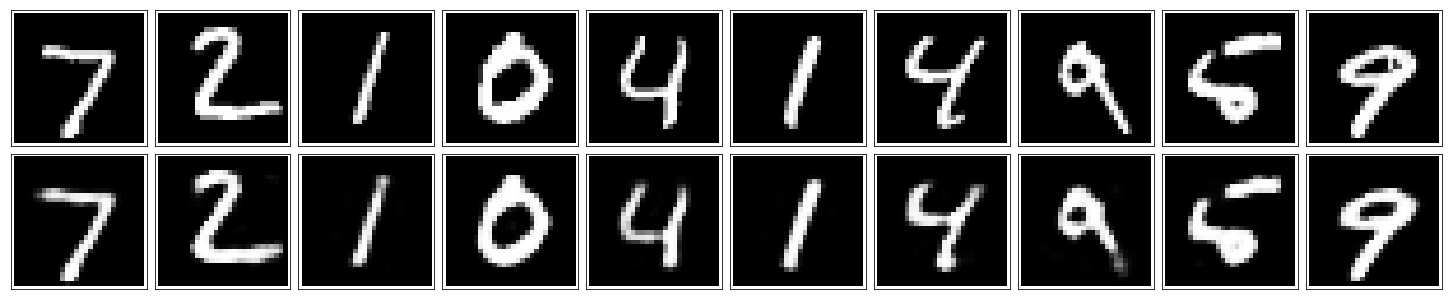

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.